# AIM Machine Learning Task

<p>Many countries speak Arabic; however, each country has its own dialect,<br> the aim of this task is to 
build a model that predicts the dialect given the text.</p>

<h6>Guidelines</h6>
- You are given a dataset which has 2 columns, id and dialect.<br>
- Target label column is the “dialect”, which has 18 classes.<br>
- The “id” column will be used to retrieve the text, to do that, you need to call this API by a 
POST request.<b> https://recruitment.aimtechnologies.co/ai-tasks</b><br>
- The request body must be a JSON as a list of strings, and the size of the list must NOT
exceed 1000.<br>
- The API will return a dictionary where the keys are the ids, and the values are the text, here
is a request and response sample.

### Importing Important  librararies

In [1]:
import pandas as pd
import requests
import json as js
from tqdm import tqdm

C:\ProgramData\Anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


### Read The Dataset

In [2]:
df=pd.read_csv('dialect_dataset.csv')

In [3]:
df.head()

,id,dialect
0,1175358310087892992,IQ
1,1175416117793349632,IQ
2,1175450108898565888,IQ
3,1175471073770573824,IQ
4,1175496913145217024,IQ


In [4]:
df.shape

(458197, 2)

The Dataset Consists of 2 columns (id and dialect) and 458197 Row

### Checking the missing values

In [6]:
df.isnull().values.any()

False

### Show The number and the amount of each category 

<AxesSubplot:>

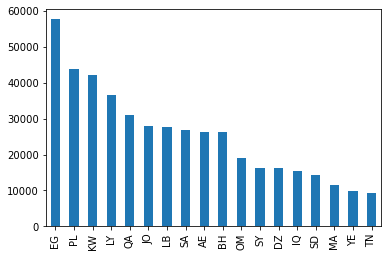

In [7]:
df["dialect"].value_counts().plot.bar()

Thegragh shows that the Dataset is unbalanced

In [8]:
df.groupby('dialect').count().count()

id    18
dtype: int64

There are 18 Category in Our dataset

In [9]:
# pip install requests

### Getting the Data using post request andThe id

In [10]:
text=[]

for i in tqdm(range(0, len(df["id"]), 1000)):
    if i+1000 < len(df["id"]):
        json_response = requests.post(
        "https://recruitment.aimtechnologies.co/ai-tasks",
        json=list(map(str, list(df["id"])[i:i+1000]))) 
    else:
        json_response = requests.post(
        "https://recruitment.aimtechnologies.co/ai-tasks",
        json=list(map(str, list(df["id"])[i:i+len(df["id"])-i]))) 
    text+=json_response.json().values()

100%|████████████████████████████████████████████████████████████████████████████████| 459/459 [08:17<00:00,  1.08s/it]


In [11]:
text

['@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .',
 '@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. حيونه ووحشيه .. وتطلبون من الغرب يحترمكم ويؤمن بدينكم ولاينعتكم بالإرهاب ..',
 '@KanaanRema مبين من كلامه خليجي',
 '@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐',
 '@hmo2406 وين هل الغيبه  اخ محمد 🌸🌺',
 '@Badi9595 @KanaanRema يااخي الإرهابي اذا كان عراقي سعودي فلسطيني وين المشكلة على باب الفرض...خليجي وماعنده رحمه وين المساس بقدسيتك .. الله يرضى عنك خلصت مشاكل العرب واختلفنا بجنسيت ابو الطفل .. المغردين سألوا من وين ورجحت وين الكارثة اللي وصلتك',
 '@SarahNadhum90 @nUBNTdfVgACYQxV مطلبي يقدم استقالته وفوگاها اعتذار',
 '@KanaanRema @Badi9595 خلص والله لعيونكم انا ماعندي شيء معه بالعكس من متابعيني اللي بعتز فيهم ... خلص صافية لبن 🌸🙏🌷',
 '@SalahAlarbawi يمكن سؤال فات الكثير اللي يصور   شنو موقفه وكأنه يوثق بطوله .. المفروض حتى المصور يحال للقضاء لان نظرات الطفله تستنجد باتجاه الكاميرا..',
 '@Eng_alow91 @cb4LwpWrS1hT5lb @EdyCohen اولا اني ردت على رجل جنوبي واللي ذكر حجابها ... ثانياً انت شدعوه 

In [12]:
len(text)

458197

In [15]:
df['text']=text

### Saving The new dataset 

In [20]:
df.to_csv("data.csv")